About Dataset

Context

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Pregnancies:Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1

# Búsqueda en cuadrícula

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:/Users/rafaR/Documents/DataS/proyectos/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

Importamos las librerias de sklearn


In [5]:
from sklearn.model_selection import GridSearchCV#permite crear la rejilla(grid) de busqueda con todas ls combinianciones posibles de los hiperparamtros
from sklearn.neighbors import KNeighborsClassifier#nuestro modelo
from sklearn.pipeline import Pipeline#nos ayuda al preprocesamiento, selección de características, entrenamiento y evaluación
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Dividimos el conjunto de datos en características (X) y etiquetas (y):

In [6]:
X = df.drop(columns=["Outcome"])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
#y = df[["Outcome"]]
#y.head()

In [8]:
y = df["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify = y, random_state = 89)
X_test.head()
#inicializar una variable con minuscula cuando es un vector
#stratify = y deveulve la misma proporción ,deveuleve la misma cantidad de personas que tienen diabetes o no
#tanto para los datos de entrenamiento como de prueba

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
462,8,74,70,40,49,35.3,0.705,39
538,0,127,80,37,210,36.3,0.804,23
285,7,136,74,26,135,26.0,0.647,51
688,1,140,74,26,180,24.1,0.828,23
163,2,100,64,23,0,29.7,0.368,21


#1°
 Creamos un pipeline que escale los datos y aplique el algoritmo KNN

#2°
 Establecemos los hiperparámetros a buscar en la búsqueda en rejilla
 
#3°
 Creamos un objeto de búsqueda en rejilla utilizando el pipeline y los hiperparámetros:
 es decirle que busque el mejor prametro con un accuracy(scoring='accuracy' --> nos indica si esta bien o
 esta mal el modelo)
 y lo repita 5 veces(cv=5)
 

In [10]:
#1°
knn_pipe = Pipeline([('mms',MinMaxScaler()),#en este caso escalar los datos
                     ('knn',KNeighborsClassifier())])#indicar el algoritmo a utilizar KNN

#2°
params = [{'knn__n_neighbors': [3, 5, 7, 9],#creamos como un areglo para indicar que pruebe con estos parametros(toma 3 elementos a su alrededor 5 elementos a su alrededor etc.)
           'knn__weights': ['uniform', 'distance'],#de este parametro queremos que pruebe de la lista ['uniform', 'distance'(entre los elemntos)] 
           'knn__leaf_size': [15, 20]}]#hace referencia a la geometria la dimensionalidad

#3°
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

In [11]:
X_train.shape,y_train.shape

((576, 8), (576,))

In [12]:
# Entrenamos la búsqueda en rejilla para el conjunto de entrenamiento:
gs_knn.fit(X_train, y_train)
# Imprimimos los mejores hiperparámetros encontrados:
gs_knn.best_params_ #regresa lso mejores parametros

{'knn__leaf_size': 15, 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}

In [13]:
# Generamos el score de los hiperparámetros encontrados:
gs_knn.score(X_train, y_train)
#vemos que dió un score un poco bajo ,podemos pensar que no hay sobreajuste

0.7934027777777778

In [14]:
# Ahora mostramos el mejor estimador:
gs_knn.best_estimator_

Pipeline(steps=[('mms', MinMaxScaler()),
                ('knn', KNeighborsClassifier(leaf_size=15, n_neighbors=9))])

Ahora tomamos ese modelo de cuadrícula y creamos algunas predicciones usando el conjunto de prueba, así como para crear informes de clasificación y matrices de confusión para ellos.

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

In [16]:
# Generamos la matriz de confusión:
grid_predictions = gs_knn.predict(X_test)
matriz = confusion_matrix(y_test, grid_predictions)

print(matriz)#nos dice nuestras valores reales vs valores predichas

[[103  22]
 [ 31  36]]


<AxesSubplot:>

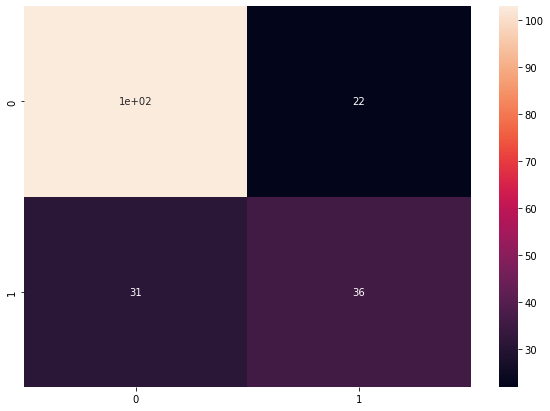

In [19]:
# Imprimimos la gráfica con la matriz de confusión:
#presentarlo graficamente
plt.figure(figsize = (10,7))
sn.heatmap(matriz, annot=True)
#podemos ver que el score de falsos negativos y falsos positivos son muy altos

In [20]:
# Reporte de clasificación:
print(classification_report(y_test, grid_predictions))
#en general se obtvo un performance muy bajo para este modelo de 

              precision    recall  f1-score   support

           0       0.77      0.82      0.80       125
           1       0.62      0.54      0.58        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.69       192
weighted avg       0.72      0.72      0.72       192

